# Fondamentaux en Recherche d'Information Web

Ce notebook a pour objectif de lister les résultats principaux et de permettre d'interagir avec les fonctionnalités principales implémentées dans ce projet.

In [1]:
import click

%matplotlib inline

def run(command, args=None):
    command.main(args or [], standalone_mode=False)

## Traitements linguistiques

In [2]:
from inspectcoll import cli as inspectcoll

### CACM

Inspection de la collection CACM.

Documents: 3204
Tokens: 110398
Terms (vocabulary size): 9497
Heaps parameters: k = 112, b = 0.38
Estimated vocabulary size for 1 million tokens: 22054
5 most frequent terms: algorithm (1621), system (1239), computer (1216), data (950), program (843)
Building and opening rank/frequency plots…


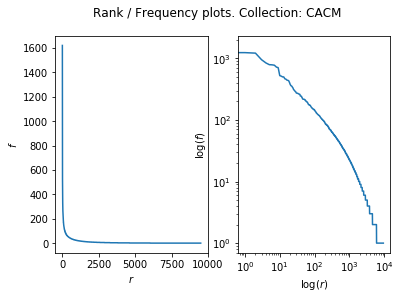

In [3]:
run(inspectcoll, ["CACM"])

### CS276

Inspection de la collection Stanford CS276.

> Note : cette collection étant très grosse, la patience est de rigueur pendant qu'elle est chargée en mémoire pour analyse.


Using cache at /Users/Florimond/Developer/cs-projects/riweb/cache/stanford_tokens.txt…
Finished consuming cache
Documents: 98998
Tokens: 25498340
Terms (vocabulary size): 347071
Heaps parameters: k = 73, b = 0.5
Estimated vocabulary size for 1 million tokens: 69613
5 most frequent terms: the (925694), of (596269), and (560904), to (432042), stanford (357767)
Building and opening rank/frequency plots…


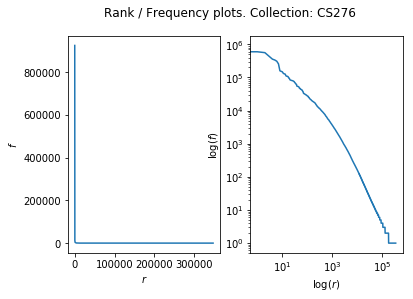

In [12]:
run(inspectcoll, ["CS276"])

## Indexation

La construction de l'index se fait avec l'algorithme BSBI (Block-Sort-Based Indexing) quelle que soit la collection. L'algorithme se déroule en deux phases :

1. **Tri** : lors de cette phase, on nourrit un tampon (*buffer*) de paires `(token, docID)`. Lorsque le tampon est plein, on trie son contenu (par token puis par docID) et on l'écrit sur le disque. On vide le tampon, ce qui libère la mémoire pour les prochaines paires. La taille du tampon est configurable mais vaut 10 000 par défaut. Nous avons estimé la mémoire vive nécessaire à cette opération à **60Mo environ**.
2. **Fusion** : dans cette phase, on fusionne les listes triées partielles en une seule.
    - Initialement, notre approche était d'ouvrir tous les fichiers intermédiaires et de procéder à une fusion par pointeurs (on prend la paire la + petite parmi les paire de tête de chaque fichier).
    - Bien que très efficace d'un point de vue mémoire, le grand nombre de fichier ouvert pour la collection CS276 (environ 1500) était incompatible avec la plupart des systèmes d'exploitation (400 maximum en général).
    - Nous procédons donc aussi à une fusion par blocs : les fichiers intermédiaires sont fusionnés par blocs de 100, jusqu'à ce qu'il n'en reste plus qu'un seul — le fichier final.
    - L'inconvénient est que la fusion s'exécute environ 2x plus lentement en raison de la plus grande quantité d'opérations disque.

In [2]:
from indexes import cli as indexes

In [3]:
run(indexes.commands["build"], ["CACM", "--force"])

Building index for cacm…
Flushed: tmp/1
Flushed: tmp/2
Flushed: tmp/3
Flushed: tmp/4
Flushed: tmp/5
Flushed: tmp/6
Flushed: tmp/7
Flushed: tmp/8
Flushed: tmp/9
Flushed: tmp/10
Flushed: tmp/11
merging ('tmp/9', 'tmp/11', 'tmp/7', 'tmp/6', 'tmp/1', 'tmp/10', 'tmp/8', 'tmp/4', 'tmp/3', 'tmp/2', 'tmp/5') into tmp/0-0
Cleaning up…
Done!


In [4]:
run(indexes.commands["build"], ["CS276", "--force"])

Building index for cs276…
Using cache at /Users/Florimond/Developer/cs-projects/riweb/cache/stanford_tokens.txt…
Flushed: tmp/1
Flushed: tmp/2
Flushed: tmp/3
Flushed: tmp/4
Flushed: tmp/5
Flushed: tmp/6
Flushed: tmp/7
Flushed: tmp/8
Flushed: tmp/9
Flushed: tmp/10
Flushed: tmp/11
Flushed: tmp/12
Flushed: tmp/13
Flushed: tmp/14
Flushed: tmp/15
Flushed: tmp/16
Flushed: tmp/17
Flushed: tmp/18
Flushed: tmp/19
Flushed: tmp/20
Flushed: tmp/21
Flushed: tmp/22
Flushed: tmp/23
Flushed: tmp/24
Flushed: tmp/25
Flushed: tmp/26
Flushed: tmp/27
Flushed: tmp/28
Flushed: tmp/29
Flushed: tmp/30
Flushed: tmp/31
Flushed: tmp/32
Flushed: tmp/33
Flushed: tmp/34
Flushed: tmp/35
Flushed: tmp/36
Flushed: tmp/37
Flushed: tmp/38
Flushed: tmp/39
Flushed: tmp/40
Flushed: tmp/41
Flushed: tmp/42
Flushed: tmp/43
Flushed: tmp/44
Flushed: tmp/45
Flushed: tmp/46
Flushed: tmp/47
Flushed: tmp/48
Flushed: tmp/49
Flushed: tmp/50
Flushed: tmp/51
Flushed: tmp/52
Flushed: tmp/53
Flushed: tmp/54
Flushed: tmp/55
Flushed: tmp/56


Flushed: tmp/483
Flushed: tmp/484
Flushed: tmp/485
Flushed: tmp/486
Flushed: tmp/487
Flushed: tmp/488
Flushed: tmp/489
Flushed: tmp/490
Flushed: tmp/491
Flushed: tmp/492
Flushed: tmp/493
Flushed: tmp/494
Flushed: tmp/495
Flushed: tmp/496
Flushed: tmp/497
Flushed: tmp/498
Flushed: tmp/499
Flushed: tmp/500
Flushed: tmp/501
Flushed: tmp/502
Flushed: tmp/503
Flushed: tmp/504
Flushed: tmp/505
Flushed: tmp/506
Flushed: tmp/507
Flushed: tmp/508
Flushed: tmp/509
Flushed: tmp/510
Flushed: tmp/511
Flushed: tmp/512
Flushed: tmp/513
Flushed: tmp/514
Flushed: tmp/515
Flushed: tmp/516
Flushed: tmp/517
Flushed: tmp/518
Flushed: tmp/519
Flushed: tmp/520
Flushed: tmp/521
Flushed: tmp/522
Flushed: tmp/523
Flushed: tmp/524
Flushed: tmp/525
Flushed: tmp/526
Flushed: tmp/527
Flushed: tmp/528
Flushed: tmp/529
Flushed: tmp/530
Flushed: tmp/531
Flushed: tmp/532
Flushed: tmp/533
Flushed: tmp/534
Flushed: tmp/535
Flushed: tmp/536
Flushed: tmp/537
Flushed: tmp/538
Flushed: tmp/539
Flushed: tmp/540
Flushed: tmp/5

Abort: 

### Modèle booléen

Le modèle booléen est implémenté à l'aide d'une classe `Q` :

- Un objet `Q` peut être combiné avec d'autres objets `Q` à l'aide des opérateurs `|` (OR), `&` (AND) et `~` (NON).
- Tout objet `Q` est évaluable sur un index : l'évaluation consiste à effectuer une suite d'opération de signature `(postings, index) -> postings`.
- Initialement, tout objet `Q` a une opération de sélection pour le terme qu'il représente.
- La combinaison de `Q1` et `Q2` consiste donc à ajouter une nouvelle opération à `Q1` qui évalue `Q2` sur l'index et fusionne la liste de postings résultante avec la liste de postings de `Q1`. Par exemple, `Q1 | Q2` ajoute à `Q1` une opération d'union avec les postings de `Q2`. Les objets `Q` peuvent ainsi être composé via un mini-langage et respectent la priorité des opérations (parenthésage).

Note : le classement des résultats de recherche n'a pas été implémenté.

In [22]:
from models.boolean import Q

Les requêtes peuvent être exécutées programmatiquement :

In [23]:
from indexes import build_index
from data_collections import CACM

# Obtention de l'index
cacm = CACM()
index = build_index(cacm)
print("OK")

# Définition d'une requête booléenne : (science OR scientific) AND NOT algorithm
query = (Q("science") | Q("scientific")) & ~Q("algorithm")
results = query(index)
print(results)

Loading cacm index from cache…
OK
[49, 236, 303, 407, 585, 679, 730, 796, 1008, 1010, 1113, 1205, 1210, 1364, 1381, 1384, 1385, 1507, 1621, 1654, 1659, 1671, 1678, 1720, 1769, 1771, 1809, 1862, 1868, 1912, 1927, 1945, 2147, 2163, 2181, 2187, 2306, 2310, 2312, 2324, 2325, 2329, 2390, 2478, 2502, 2538, 2553, 2813, 2820, 2823, 2852, 2861, 2879, 2899, 2930, 2935, 2962, 2971, 2985, 3003, 3010, 3015, 3019, 3022, 3024, 3122, 3130, 3140, 3160, 3161]


Ou via l'interface en ligne de commande :

In [25]:
run(boolean, ["CACM", '(Q("science") | Q("scientific")) & ~Q("algorithm")'])

Loading cacm index from cache…
Executing <Q [<function Q.__or__.<locals>.union at 0x111a5da60>, <function Q.__and__.<locals>.intersect at 0x107ecb950>]>...
[49, 236, 303, 407, 585, 679, 730, 796, 1008, 1010, 1113, 1205, 1210, 1364, 1381, 1384, 1385, 1507, 1621, 1654, 1659, 1671, 1678, 1720, 1769, 1771, 1809, 1862, 1868, 1912, 1927, 1945, 2147, 2163, 2181, 2187, 2306, 2310, 2312, 2324, 2325, 2329, 2390, 2478, 2502, 2538, 2553, 2813, 2820, 2823, 2852, 2861, 2879, 2899, 2930, 2935, 2962, 2971, 2985, 3003, 3010, 3015, 3019, 3022, 3024, 3122, 3130, 3140, 3160, 3161]


Note : l'affichage des documents eux-mêmes n'a pas été implémenté mais il serait aisé de récupérer le contenu des documents via un dictionnaire `(docId, document)`.

### Modèle vectoriel

Le modèle vectoriel implémente l'algorithme de recherche vectoriel décrit dans le cours FRI-Web. Deux schémas de pondération sont disponible :

- `simple` : il s'agit d'un schéma tf-idf avec : $p_{tf_{t_i, d}} = tf_{t_i, d}$, $p_{df_{t_i}} = 1$ et $n_d = 1$.
- `complex` : il s'agit d'un schéma tf-idf avec : $p_{tf_{t_i, d}} = 1 + \ln(tf_{t_i, d})$ si $tf_{t_i, d} > 0$ et $0$ sinon, $p_{df_{t_i}} = idf{t_i}$ et $n_d = \dfrac{1}{||d||}$.

Il est possible de n'afficher que les $k$ premiers résultats ($k = 10$ par défaut).

In [26]:
from models.vector import cli as vector

Exécution d'une requête avec le schéma `simple` :

In [27]:
run(vector, ["CACM", "algorithm data science"])

Loading cacm index from cache…
Weighting scheme: simple
Query: algorithm data science
Results: [2046, 2406, 1771, 1922, 696, 1359, 2651, 2750, 1946, 2198]


Affichage des 5 premiers résultats seulement :

In [30]:
run(vector, ["CACM", "algorithm data science", "-k", "5"])

Loading cacm index from cache…
Weighting scheme: simple
Query: algorithm data science
Results: [2046, 2406, 1771, 1922, 696]


Exécution d'une requête avec le schéma `complex` :

In [28]:
run(vector, ["CACM", "algorithm data science", "-w", "complex"])

Loading cacm index from cache…
Weighting scheme: complex
Query: algorithm data science
Results: [1771, 1927, 3130, 2310, 2823, 1659, 3022, 3176, 2899, 1385]


Note : l'affichage des documents eux-mêmes n'a pas été implémenté mais il serait aisé de récupérer le contenu des documents via un dictionnaire `(docId, doc)`.

### Evaluation de la collection CACM

In [4]:
from evaluation import cli as evaluation

#### Performances générales

In [5]:
run(evaluation.commands["showperfs"], ["CACM"])

Collection: cacm

-----Boolean request execution time-----

Loading cacm index from cache…
Executing <Q [<function Q.__or__.<locals>.union at 0x110789400>]>...
[29, 30, 112, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 139, 140, 149, 150, 151, 152, 158, 159, 160, 168, 172, 177, 178, 179, 180, 181, 182, 185, 186, 199, 200, 201, 212, 214, 226, 227, 228, 244, 245, 246, 247, 253, 255, 256, 257, 258, 259, 260, 264, 284, 289, 290, 299, 301, 302, 304, 305, 306, 307, 308, 309, 310, 311, 316, 324, 325, 326, 327, 328, 338, 339, 340, 341, 342, 343, 344, 345, 346, 347, 348, 350, 351, 352, 353, 354, 355, 356, 357, 358, 359, 360, 368, 369, 370, 371, 372, 373, 374, 375, 376, 377, 384, 385, 386, 387, 388, 389, 390, 405, 418, 419, 420, 421, 422, 423, 424, 425, 426, 427, 428, 429, 430, 431, 432, 442, 443, 444, 445, 446, 448, 449, 450, 451, 452, 453, 454, 455, 456, 458, 459, 460, 465, 466, 467, 468, 469, 470, 471, 472, 473, 479, 484, 485, 486, 487, 498, 499, 500, 501, 502, 503, 504, 505, 506, 5

#### Courbes rappel-précision

In [17]:
run(evaluation.commands["plot"])


--Vector search precision-recall curve--

Loading cacm index from cache…
Computing precision and recall values…
k: 1 precision: 0.140625 recall: 0.011306532663316583
k: 2 precision: 0.125 recall: 0.020100502512562814
k: 3 precision: 0.109375 recall: 0.026381909547738693
k: 4 precision: 0.109375 recall: 0.035175879396984924
k: 5 precision: 0.09375 recall: 0.03768844221105527
k: 6 precision: 0.0859375 recall: 0.0414572864321608
k: 7 precision: 0.08258928571428571 recall: 0.04648241206030151
k: 8 precision: 0.078125 recall: 0.05025125628140704
k: 9 precision: 0.07465277777777778 recall: 0.05402010050251256
k: 10 precision: 0.06875 recall: 0.05527638190954774
k: 11 precision: 0.06818181818181818 recall: 0.06030150753768844
k: 12 precision: 0.06640625 recall: 0.06407035175879397
k: 13 precision: 0.06129807692307692 recall: 0.06407035175879397
k: 14 precision: 0.06473214285714286 recall: 0.0728643216080402
k: 15 precision: 0.06458333333333334 recall: 0.07788944723618091
k: 16 precision: 0.0

Abort: 

#### R-précision

In [18]:
run(evaluation.commands["rprec"])


--R-precision for the cacm collection---

Loading cacm index from cache…
query 1: 5-precision = 0.0
query 2: 3-precision = 0.0
query 3: 6-precision = 0.0
query 4: 12-precision = 0.08333333333333333
query 5: 8-precision = 0.0
query 6: 3-precision = 0.3333333333333333
query 7: 28-precision = 0.07142857142857142
query 8: 3-precision = 0.3333333333333333
query 9: 9-precision = 0.0
query 10: 35-precision = 0.3142857142857143
query 11: 19-precision = 0.3157894736842105
query 12: 5-precision = 0.0
query 13: 11-precision = 0.09090909090909091
query 14: 44-precision = 0.06818181818181818
query 15: 10-precision = 0.0
query 16: 17-precision = 0.058823529411764705
query 17: 16-precision = 0.0
query 18: 11-precision = 0.09090909090909091
query 19: 11-precision = 0.09090909090909091
query 20: 3-precision = 0.0
query 21: 11-precision = 0.09090909090909091
query 22: 17-precision = 0.17647058823529413
query 23: 4-precision = 0.0
query 24: 13-precision = 0.07692307692307693
query 25: 51-precision = 0.1

#### F-mesure et E-mesure

In [19]:
run(evaluation.commands["fe"])

Loading cacm index from cache…
Computing precision and recall…
Precision: 0.06875
Recall: 0.05527638190954774
F-measure: 0.06
E-measure: 0.94
ß (= P/R): 1.24
